# *AdEase Time Series*

Ad Ease is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.

You are working in the Data Science team of Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.

### Data Dictionary:

There are two csv files given

train_1.csv: In the csv file, each row corresponds to a particular article and each column corresponds to a particular date. The values are the number of visits on that date.

The page name contains data in this format:

SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN

having information about the page name, the main domain, the device type used to access the page, and also the request origin(spider or browser agent)


Exog_Campaign_eng: This file contains data for the dates which had a campaign or significant event that could affect the views for that day. The data is just for pages in English.

There’s 1 for dates with campaigns and 0 for remaining dates. It is to be treated as an exogenous variable for models when training and forecasting data for pages in English

### Concepts Tested:

- Exploratory data analysis

- Time Series forecasting- ARIMA, SARIMAX, and Prophet

In [4]:
# libraries to analyze data
import numpy as np
import pandas as pd

# libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

import re

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
# read the file into a pandas dataframe
df = pd.read_csv('train_1.csv')

In [6]:
df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(f'Info of the dataset is {df.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB
Info of the dataset is None


In [8]:
# To get the shape of the dataset 
print(f"Number of records : {df.shape[0]}")
print(f"Total Features:  {df.shape[1]}")

Number of records : 145063
Total Features:  551


In [9]:
print(f'Number of nan/null values in each column:{df.isna().sum()}')

Number of nan/null values in each column:Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64


In [10]:
print(f'Number of unique values in each column: \n{df.nunique()}')

Number of unique values in each column: 
Page          145063
2015-07-01      6898
2015-07-02      6823
2015-07-03      6707
2015-07-04      6995
               ...  
2016-12-27      8938
2016-12-28      8819
2016-12-29      8761
2016-12-30      8733
2016-12-31      8826
Length: 551, dtype: int64


In [11]:
print(f'Duplicate entries: \n{df.duplicated().sum()}')

Duplicate entries: 
0


In [12]:
df.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.412100e+05,1.414790e+05,1.418740e+05,1.413190e+05,1.411450e+05,1.413620e+05,1.412410e+05,1.412370e+05,1.414280e+05,1.415980e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.394096e+03,1.377482e+03,1.393099e+03,1.523740e+03,1.679607e+03,1.678302e+03,1.633966e+03,1.684308e+03,1.467943e+03,1.478282e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,8.574880e+04,7.732794e+04,8.478533e+04,8.752210e+04,9.794534e+04,9.232482e+04,9.185831e+04,9.014266e+04,8.155481e+04,8.873567e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.200000e+01,2.200000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.300000e+01,2.300000e+01,2.100000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.490000e+02,1.430000e+02,1.320000e+02,1.450000e+02,1.600000e+02,1.620000e+02,1.630000e+02,1.600000e+02,1.540000e+02,1.360000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,6.070000e+02,5.980000e+02,5.690000e+02,6.280000e+02,6.590000e+02,6.680000e+02,6.540000e+02,6.490000e+02,6.350000e+02,5.610000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


In [13]:
df.describe(include='object')

,Page
count,145063
unique,145063
top,2NE1_zh.wikipedia.org_all-access_spider
freq,1


### Insight
- There are **145063** entries with 551 columns, i.e. 145063 wikipedia pages with views for 550 days
- There are null/missing values in each of the dates
- There are no **duplicates**
- There are **145063** unique wikipedia pages

In [15]:
# read the file containing flag for each date indicating if those dates had a campaign/significant event
exog_en = pd.read_csv('Exog_Campaign_eng')

In [16]:
print(f'Info of the dataset is {exog_en.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Exog    550 non-null    int64
dtypes: int64(1)
memory usage: 4.4 KB
Info of the dataset is None


In [17]:
print(f'Shape of the dataset is {exog_en.shape}')

Shape of the dataset is (550, 1)


In [18]:
print(f'Number of nan/null values in each column: {exog_en.isna().sum()}')

Number of nan/null values in each column: Exog    0
dtype: int64


In [19]:
print(f'Number of unique values in each column: \n{exog_en.nunique()}')

Number of unique values in each column: 
Exog    2
dtype: int64


In [20]:
print(f'Duplicate entries: \n{exog_en.duplicated().value_counts()}')

Duplicate entries: 
True     548
False      2
Name: count, dtype: int64


In [21]:
exog_en.head()

,Exog
0,0
1,0
2,0
3,0
4,0


### Insight
- There are **550** entries corresponding to 550 days in the previous dataset
- There are **no** null/missing values
- There are **2** unique values - 1 ans 0

# Exploratory Data Analysis

## Analysing date columns

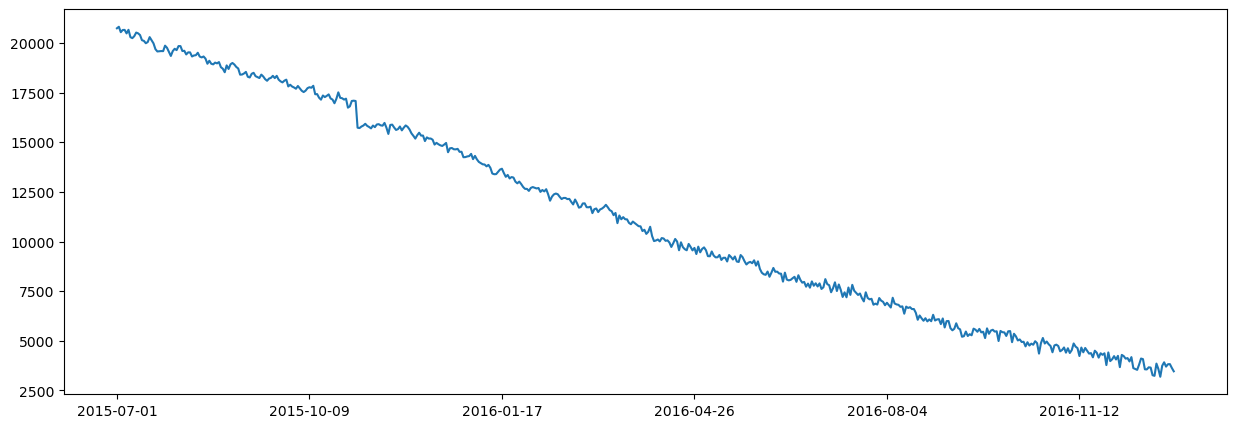

In [25]:
date_columns = df.columns[1:]
df[date_columns].isna().sum().plot(figsize=(15,5))
plt.show()

### Insight
- It can be observed that the null values keep decreasing with dates, indicating that there were no views for these dates
- We can infer that the webpages which were lauched recently will not have view data prior to launch and hence can be filled with 0

In [27]:
df[date_columns] = df.loc[:,date_columns].fillna(0)

In [28]:
df.isna().sum()

Page          0
2015-07-01    0
2015-07-02    0
2015-07-03    0
2015-07-04    0
             ..
2016-12-27    0
2016-12-28    0
2016-12-29    0
2016-12-30    0
2016-12-31    0
Length: 551, dtype: int64

In [29]:
# Get the date range of columns 
start_date, end_date = df.columns[1:].min(), df.columns[1:].max()
print(f"Columns date range: {start_date} till {end_date}")

Columns date range: 2015-07-01 till 2016-12-31


### Insights:
1. There are 550 days of per day views data for roughly 145,000 pages from different languages
2. We have per day view data starting from 2015-07-01 till 2016-12-26 

In [31]:
# To check to see if we have all dates in columns - generate the date range 
# Compare it with the columns of the dataset 

_range = pd.date_range(start=start_date,end=end_date,freq="D")
print(f"Date mismataches: {(df.columns[1:] != _range).sum()}")

Date mismataches: 0


### Insights:
1. Regardless of the null values, we have a column for each date. This check is to prevent issues during modelling

## Extracting information from Page column

In [34]:
df['Page'].sample(20)

82029         File_commons.wikimedia.org_desktop_all-agents
20714     Help:Categories/tr_www.mediawiki.org_all-acces...
20819     Help_talk:Formatting_www.mediawiki.org_all-acc...
101914    Кличко,_Владимир_Владимирович_ru.wikipedia.org...
93567     Sofía_Vergara_es.wikipedia.org_all-access_all-...
110822    Fabrizio_Bernardi_en.wikipedia.org_all-access_...
49010        Gene_Wilder_de.wikipedia.org_all-access_spider
38127           Holi_en.wikipedia.org_all-access_all-agents
106072           大月薰_zh.wikipedia.org_mobile-web_all-agents
75780     Leonardo_DiCaprio_en.wikipedia.org_mobile-web_...
142648     Pablo_Escobar_es.wikipedia.org_all-access_spider
88778     先進技術実証機_(航空機)_ja.wikipedia.org_desktop_all-agents
118419    Gojko_Mitić_de.wikipedia.org_mobile-web_all-ag...
137678    Germanwings-Flug_9525_de.wikipedia.org_all-acc...
44417     File:A_Google_Glass_wearer.jpg_commons.wikimed...
69050     Mariä_Aufnahme_in_den_Himmel_de.wikipedia.org_...
108540         朱拉蓬公主_zh.wikipedia.org_mo

### Insight
The page name contains data in the below format: \
**SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN** \
having information about page name, thn domain, device type used to access t e
page, aso the request origin(spider or browser age
2.

### Extracting name

In [37]:
def extract_name(page):
    pattern = r'(.{0,})_(.{2}).wikipedia.org_'
    result = re.findall(pattern, page)
    if len(result) == 1:
        return result[0][0]
    else:
        return 'unknown'
df['name'] = df['Page'].apply(extract_name)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5972\232731524.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['name'] = df['Page'].apply(extract_name)


### Extracting language

In [39]:
def extract_lang(page):
    pattern = r'(.{0,})_(.{2}).wikipedia.org_'
    result = re.findall(pattern, page)
    if len(result) == 1:
        return result[0][1]
    else:
        return 'un'
df['language'] = df['Page'].apply(extract_lang)
print(df['language'].unique())

['zh' 'fr' 'en' 'un' 'ru' 'de' 'ja' 'es']


C:\Users\DELL\AppData\Local\Temp\ipykernel_5972\2619776546.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['language'] = df['Page'].apply(extract_lang)


In [40]:
lang_name_mapping={'zh':'Chinese', 'fr':'French', 'en':'English',
                   'un':'Unknown', 'ru':'Russian', 'de':'German',
                   'ja':'Japanese', 'es':'Spanish'}
df['language'] = df['language'].map(lang_name_mapping)

### Univariate Analysis: 

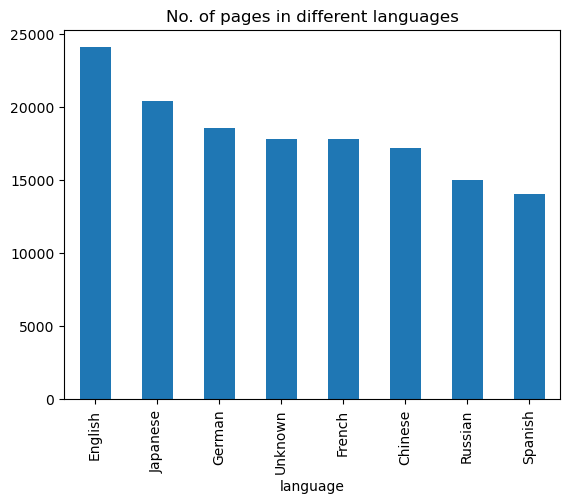

% of pages in different languages


language
English     16.62
Japanese    14.08
German      12.79
Unknown     12.31
French      12.27
Chinese     11.88
Russian     10.36
Spanish      9.70
Name: proportion, dtype: float64

In [42]:

df['language'].value_counts().plot(kind='bar', title='No. of pages in different languages')
plt.show()
print("% of pages in different languages")
round(df['language'].value_counts(normalize=True)*100,2)

### Insight
- Maximum number of pages, **16.62%**, are in **English** language
- 16.62% of the pages are in English. Closely followed by Japanese ~14% 
- Rest of the languages have almost equal proportion of ~12%

### Extracting access type

C:\Users\DELL\AppData\Local\Temp\ipykernel_5972\2527076394.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['access_type'] = df['Page'].str.findall(r'all-access|mobile-web|desktop').apply(lambda x: x[0])


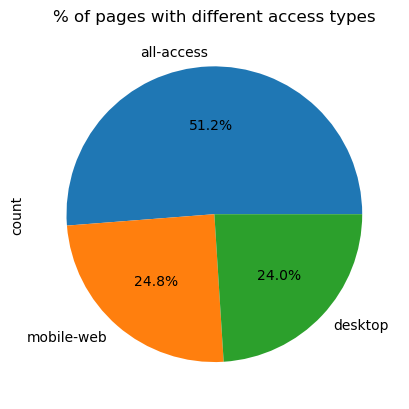

In [45]:
df['access_type'] = df['Page'].str.findall(r'all-access|mobile-web|desktop').apply(lambda x: x[0])
df['access_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='% of pages with different access types')
plt.show()

### Insight
- Maximum number of pages, **51.2%**, have **all-access** access type

### Extracting access origin

C:\Users\DELL\AppData\Local\Temp\ipykernel_5972\569160401.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['access_origin'] = df['Page'].str.findall(r'spider|agents').apply(lambda x: x[0])


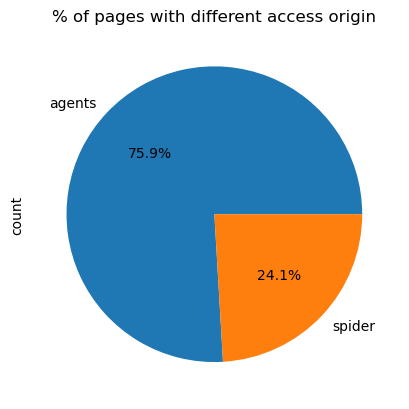

In [48]:
df['access_origin'] = df['Page'].str.findall(r'spider|agents').apply(lambda x: x[0])
df['access_origin'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='% of pages with different access origin')
plt.show()

### Insight
- Maximum number of pages, **75.9%**, have **agents** access origin

### Bivariate Analysis:

<Axes: xlabel='language', ylabel='count'>

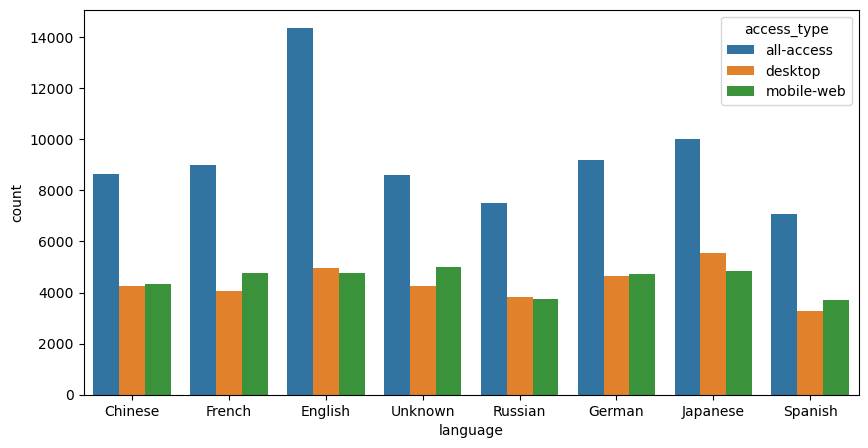

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="language",hue="access_type")

### Insights: 
- English has more pages with AccessType of all-access, different from the rest

# Aggregate and Pivoting

In [54]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,name,language,access_type,access_origin
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,Chinese,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,Chinese,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,Chinese,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,Chinese,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,11.0,27.0,13.0,36.0,10.0,52_Hz_I_Love_You,Chinese,all-access,spider


**Aggregating on language by taking average views per language for each date**

In [56]:
df_agg = df.drop(columns=['Page', 'name', 'access_type', 'access_origin']).groupby('language').mean().T.reset_index()
df_agg['index'] = pd.to_datetime(df_agg['index'])
df_agg = df_agg.set_index('index')
df_agg.head()

language,Chinese,English,French,German,Japanese,Russian,Spanish,Unknown
index,,,,,,,,
2015-07-01,240.582042,3513.862203,475.150994,714.968405,580.647056,629.999601,1085.972919,83.479922
2015-07-02,240.941958,3502.511407,478.202000,705.229741,666.672801,640.902876,1037.814557,87.471857
2015-07-03,239.344071,3325.357889,459.837659,676.877231,602.289805,594.026295,954.412680,82.680538
2015-07-04,241.653491,3462.054256,491.508932,621.145145,756.509177,558.728132,896.050750,70.572557
2015-07-05,257.779674,3575.520035,482.557746,722.076185,725.720914,595.029157,974.508210,78.214562


## Time series plots for all languages

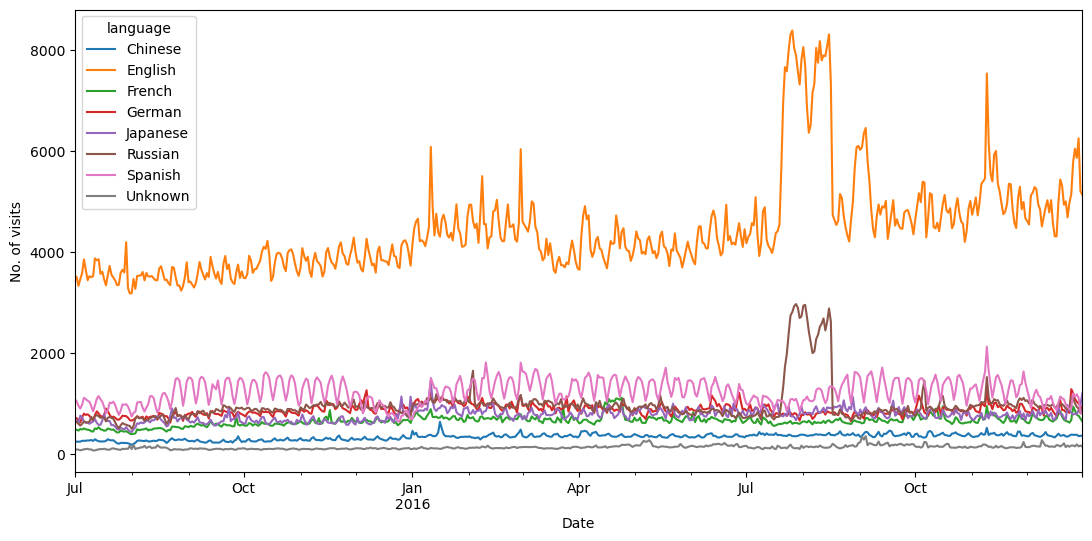

In [58]:
df_agg.plot(figsize=(13,6))
plt.xlabel('Date')
plt.ylabel('No. of visits')
plt.show()

### Insight
- **English** pages are the **most visited** pages follwed by Spanish
- **English** pages have an **upward trend** in terms of visits
- There is an **unusual peak** from **mid of July to end of August 2016**

In [60]:
agg_data_medians = df.drop(columns=['Page', 'name', 'access_type', 'access_origin']).groupby('language').median().T.reset_index()
agg_data_medians['index'] = pd.to_datetime(agg_data_medians['index'])
agg_data_medians = agg_data_medians.set_index('index')
agg_data_medians.head()

language,Chinese,English,French,German,Japanese,Russian,Spanish,Unknown
index,,,,,,,,
2015-07-01,32.0,103.0,72.0,62.0,125.0,136.0,267.0,3.0
2015-07-02,29.0,100.0,72.0,62.0,122.0,135.0,262.0,3.0
2015-07-03,28.0,90.0,71.5,59.0,128.0,137.0,237.0,3.0
2015-07-04,29.0,87.0,71.0,61.0,139.0,135.0,199.0,3.0
2015-07-05,31.0,93.0,78.0,71.0,138.0,141.0,237.0,3.0


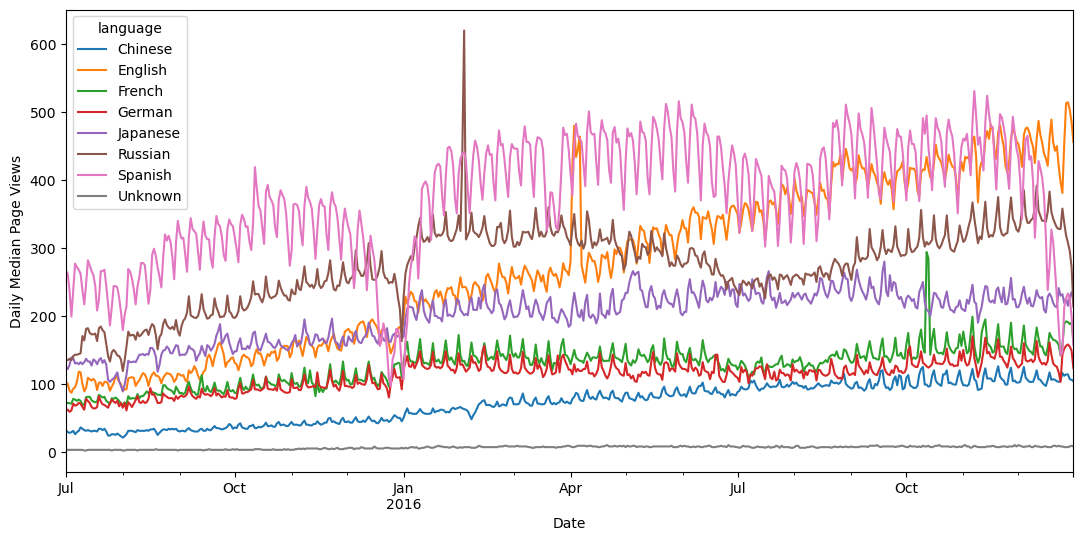

In [61]:
agg_data_medians.plot(figsize=(13,6))
plt.xlabel("Date")
plt.ylabel("Daily Median Page Views");

### Insights:
1. In daily median views, Spanish language pages seem to be higher than other language pages
2. Spanish, Russian, and English median daily views had a drop. 
3. In later months of 2016, english pages median daily views is on part with that of Spanish

In [63]:
agg_data_sum = df.drop(columns=['Page', 'name', 'access_type', 'access_origin']).groupby('language').sum().T.reset_index()
agg_data_sum['index'] = pd.to_datetime(agg_data_sum['index'])
agg_data_sum = agg_data_sum.set_index('index')
agg_data_sum.head()

language,Chinese,English,French,German,Japanese,Russian,Spanish,Unknown
index,,,,,,,,
2015-07-01,4144988.0,84712190.0,8458638.0,13260519.0,11863200.0,9463854.0,15278553.0,1490534.0
2015-07-02,4151189.0,84438545.0,8512952.0,13079896.0,13620792.0,9627643.0,14601013.0,1561810.0
2015-07-03,4123659.0,80167728.0,8186030.0,12554042.0,12305383.0,8923463.0,13427632.0,1476261.0
2015-07-04,4163448.0,83463204.0,8749842.0,11520379.0,15456239.0,8393214.0,12606538.0,1260073.0
2015-07-05,4441286.0,86198637.0,8590493.0,13392347.0,14827204.0,8938528.0,13710356.0,1396521.0


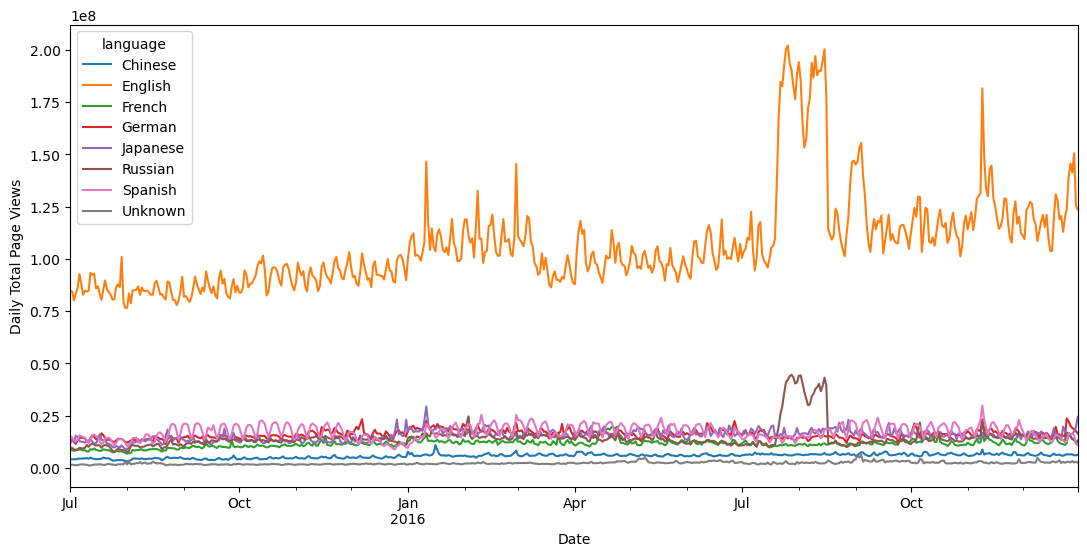

In [64]:
agg_data_sum.plot(figsize=(13,6))
plt.xlabel("Date")
plt.ylabel("Daily Total Page Views");

### Insights:
1. Given that English has high number of pages, it is no surprise that total daily views of English pages is high too
2. Daily total views of spanish seem to have some seasonality

# Stationarity, Detrending, ACF and PACF

## Stationarity test

**Using Augmented Dickey-Fuller test to check for stationarity**
- H0: The series is not stationary
- H1: The series is stationary

In [69]:
def adfuller_test(time_series):
    p_value = sm.tsa.stattools.adfuller(time_series)[1]
    if(p_value < 0.05):
        print('The time series is stationary')
    else:
        print('The time series is not stationary')

In [70]:
for lang in df_agg.columns:
    print(lang)
    adfuller_test(df_agg[lang])
    print()

Chinese
The time series is not stationary

English
The time series is not stationary

French
The time series is not stationary

German
The time series is not stationary

Japanese
The time series is not stationary

Russian
The time series is stationary

Spanish
The time series is stationary

Unknown
The time series is stationary



### Insight
- Based on the Augmented Dickey-Fuller test, the time series corresponding to **Russian** and **Spanish** language page visits are **stationary**
- The time series corresponding to **Chinese, English, French, German** and **Japanese** language page visits are **not stationary**

**From now on, we will work only on the English language page visit time series**

In [73]:
ts_english = df_agg['English']

<Axes: >

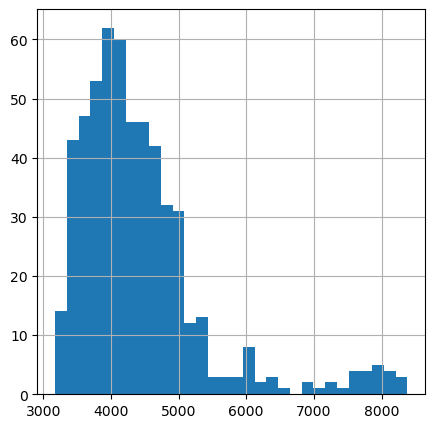

In [74]:
# Lets plot the histogram of English 
plt.figure(figsize=(5,5))
ts_english.hist(bins=30)

<Axes: >

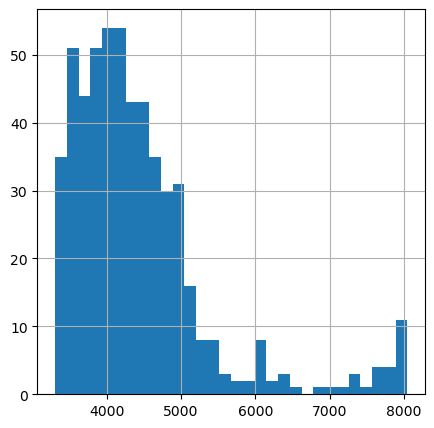

In [75]:
plt.figure(figsize=(5,5))
English_clipped = ts_english.clip(lower=ts_english.quantile(0.01),upper=ts_english.quantile(0.99))
English_clipped.hist(bins=30)

### Insights:
1. Clipped the series using quantile technique with lower & upper quantiles as 0.01,0.99. 
2. Looking at the plots, clipping seems optional 

**Let us look at the English time series along with its exog flag**

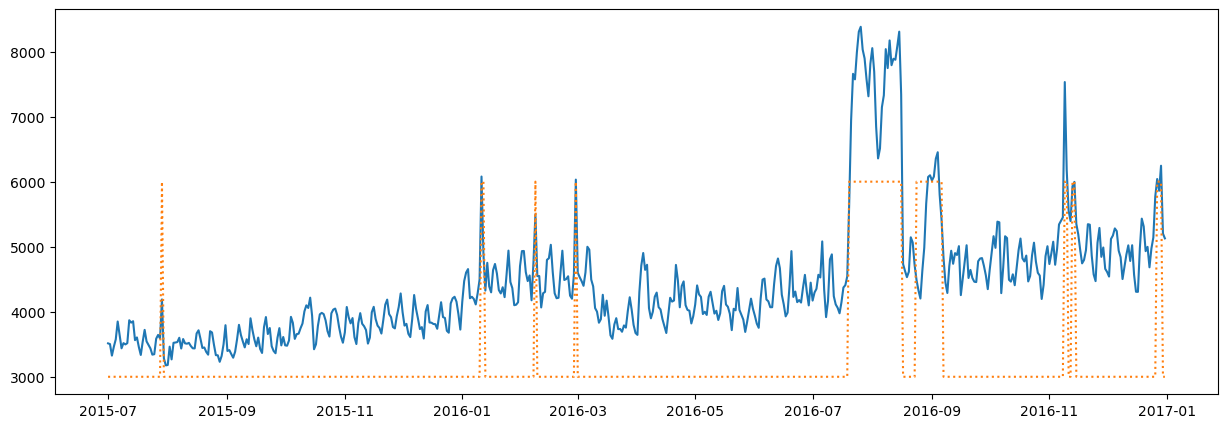

In [78]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ts_english.index, ts_english)
ax.plot(ts_english.index, (exog_en+1)*3000, ':')
plt.show()

### Insight
- It is very clear from the above plot that the time series looks like an additive time series with linear up trend and linear sesonality
- The unusual spikes in the visits are due to the special events marked by the orange peaks`m

## De-trending and De-seasoning

As the trend is linear, differencing with the previous value should de-trend the time series

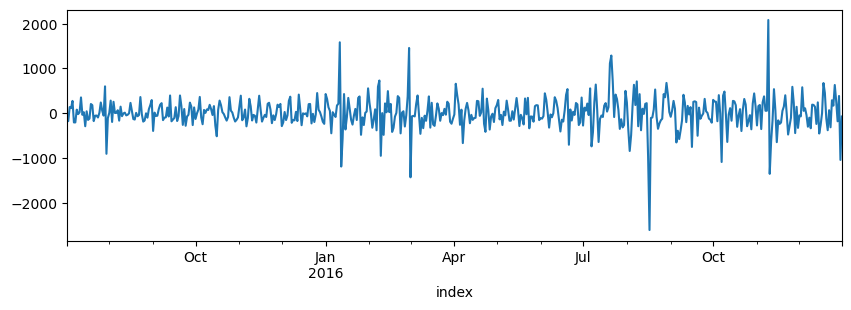

In [82]:
ts_english.diff(1).dropna().plot(figsize=(10,3))
plt.show()

In [83]:
adfuller_test(ts_english.diff(1).dropna())

The time series is stationary


### Insight
The time series became stationary by just doing first-order differencing, hence **d=1**\
Let's now look at the seasonality

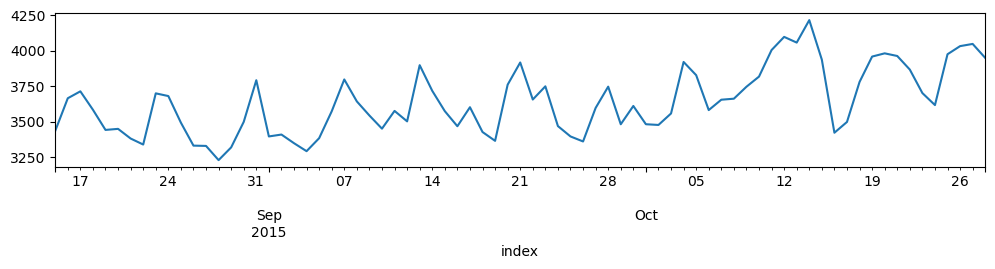

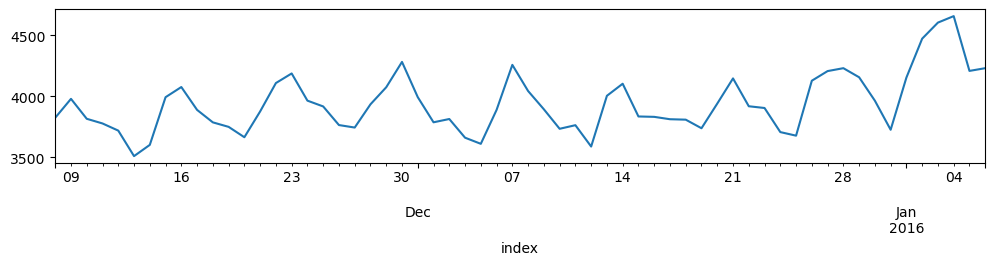

In [85]:
ts_english[45:120].plot(figsize=(12,2))
plt.show()
ts_english[130:190].plot(figsize=(12,2))
plt.show()

### Insight
- Observing the above two plots, we can conclude that there is a **seasonality** of **7 days**. So **s=7**
- The peaks and troughs repeat every 7 days

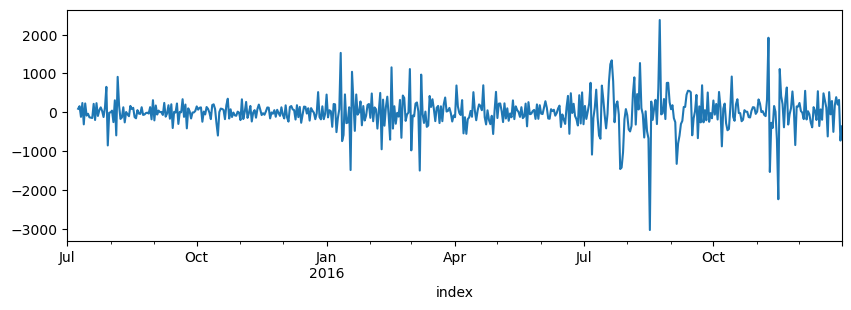

In [87]:
ts_english.diff(1).diff(7).plot(figsize=(10,3))
plt.show()

In [88]:
adfuller_test(ts_english.diff(1).diff(7).dropna())

The time series is stationary


After **removing** the **trend**(and if required, **seasonality**) manually, the Augmented Dickey-Fuller test says that the **time series is stationary**

## Auto de-composition
We had done manual decomposition above but there is a statsmodel library to decompose time series

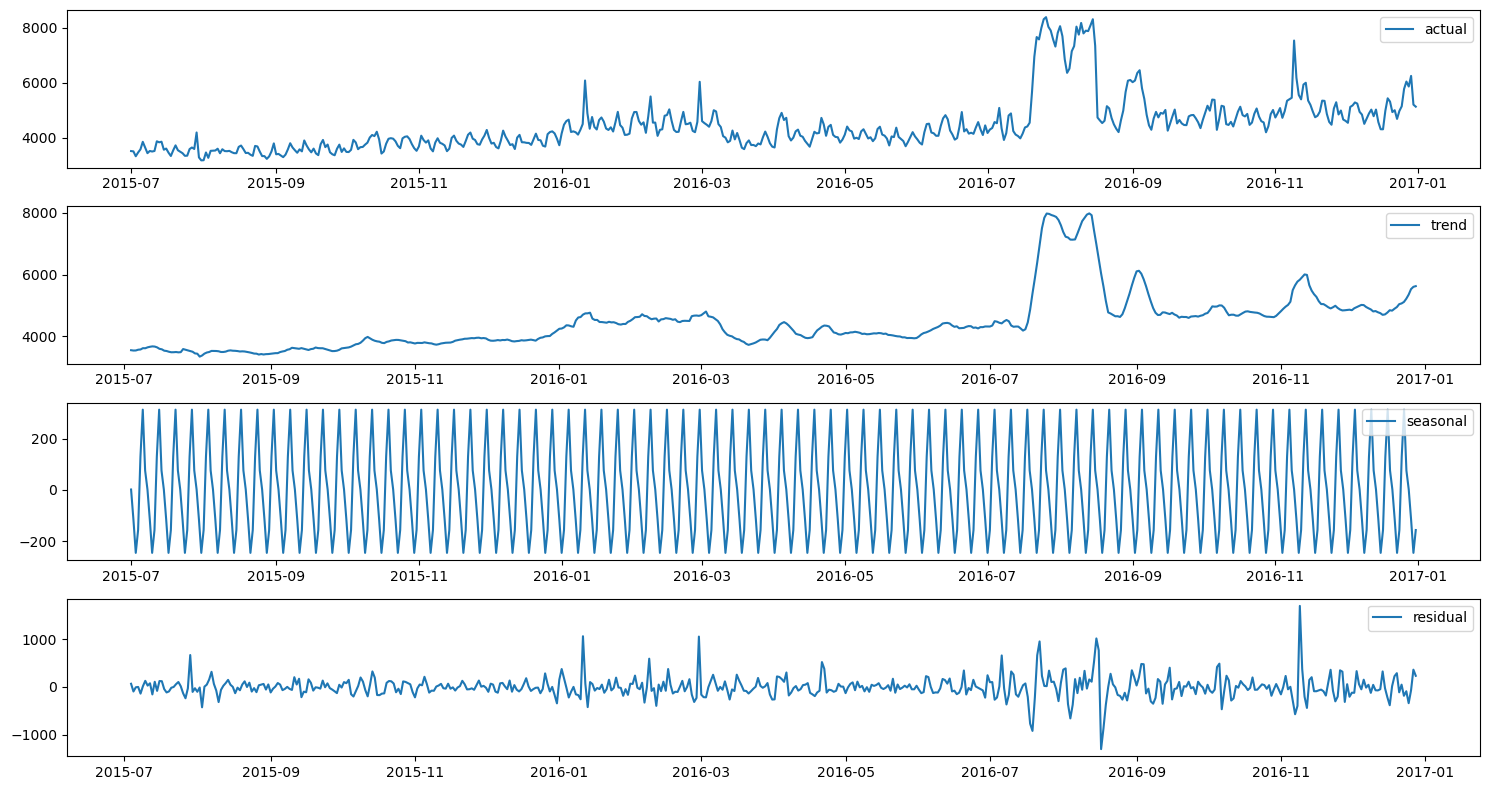

In [91]:
decom = seasonal_decompose(ts_english)
ts_english_trend = decom.trend
ts_english_seas = decom.seasonal
ts_english_res = decom.resid
plt.figure(figsize=(15,8))
plt.subplot(411)
plt.plot(ts_english, label='actual')
plt.legend()
plt.subplot(412)
plt.plot(ts_english_trend, label='trend')
plt.legend()
plt.subplot(413)
plt.plot(ts_english_seas, label='seasonal')
plt.legend()
plt.subplot(414)
plt.plot(ts_english_res, label='residual')
plt.legend()
plt.tight_layout()
plt.show()

## ACF and PACF plots
- The ACF plot shows the correlation of a time series with itself at different lags, while the PACF plot shows the correlation of a time series with itself at different lags, after removing the effects of the previous lags
- The ACF plot can be used to identify the order of an AR model. The order of an AR model is the number of lags that are included in the model. The ACF plot will show spikes at the lags that are included in the model.
- The PACF plot can be used to identify the order of an MA model. The order of an MA model is the number of lags that are included in the model. The PACF plot will show spikes at the lags that are included in the model \
**Note**: Stationary data needs to be provided to the ACF and PACF plots

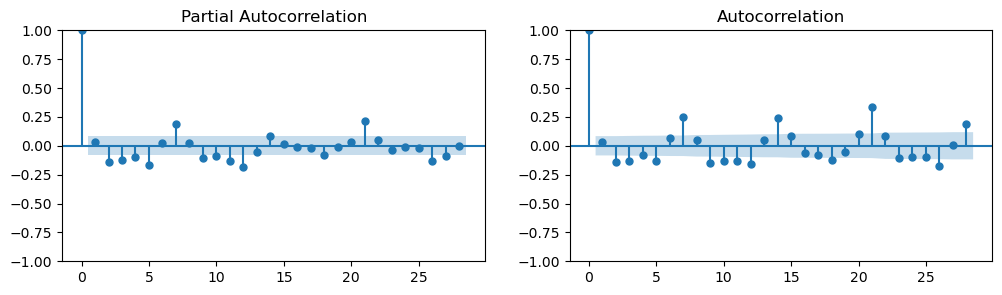

In [93]:
fig, axs = plt.subplots(1,2, figsize=(12, 3))
plot_pacf(ax=axs[0], x=ts_english.diff(1).dropna())
plot_acf(ax=axs[1], x=ts_english.diff(1).dropna())
plt.show()

### Insight
- From the PACF plot, we can see that there are 3 significant lags, at 5, 7 and 21. So **P=1,2 or 3**
- From the ACF plot, we can see that there are 3 significant lags, at 7, 14 and 21. So **Q=1,2 or 3**
- From the PACF plot, the cut-off is right from lag 0 and same for ACF plot. hence, **p** and **q =  0 or 1**

# Model building and Evaluation

In [96]:
# Creating a function to print values of all these metrics.
def performance(actual, predicted, print_metrics=True):
    MAE = round(mae(actual, predicted), 3)
    RMSE = round(mse(actual, predicted)**0.5, 3)
    MAPE = round(mape(actual, predicted), 3)
    if(print_metrics==True):
        print('MAE :', MAE)
        print('RMSE :', RMSE)
        print('MAPE:', MAPE)
    return MAE, RMSE, MAPE

## ARIMA model

In [98]:
TS = ts_english.copy(deep=True)

C:\Users\DELL\anaconda_soft\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda_soft\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda_soft\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


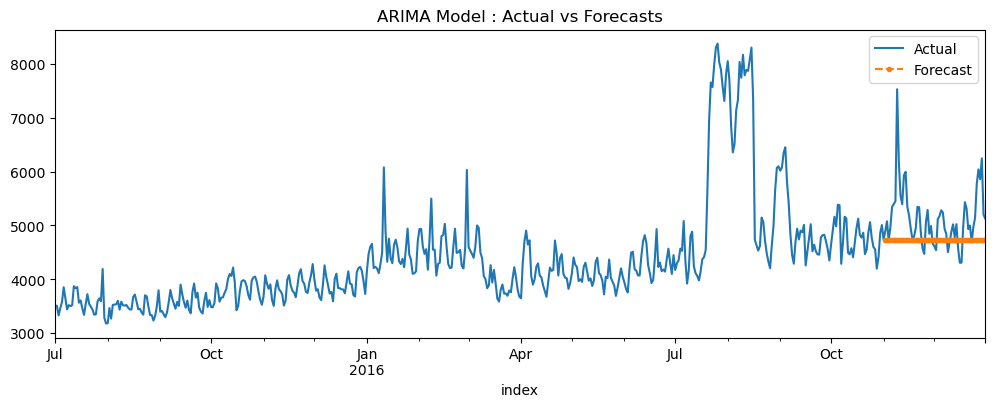

MAE : 477.636
RMSE : 672.778
MAPE: 0.086


In [99]:
n_forecast = 60
model = ARIMA(TS[:-n_forecast], order = (0,1,0))
model = model.fit()
predicted = model.forecast(steps= n_forecast, alpha = 0.05)
plt.figure(figsize=(12,4))
TS.plot(label = 'Actual')
predicted.plot(label = 'Forecast', linestyle='dashed', marker='.')
plt.legend(loc="upper right")
plt.title('ARIMA Model : Actual vs Forecasts')
plt.show()
(_,_,_) = performance(TS.values[-n_forecast:], predicted.values, print_metrics=True)

### Insight
- The model is not doing a good job, even for different combinations of p and q

## SARIMAX model

In [102]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\DELL\anaconda_soft\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda_soft\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


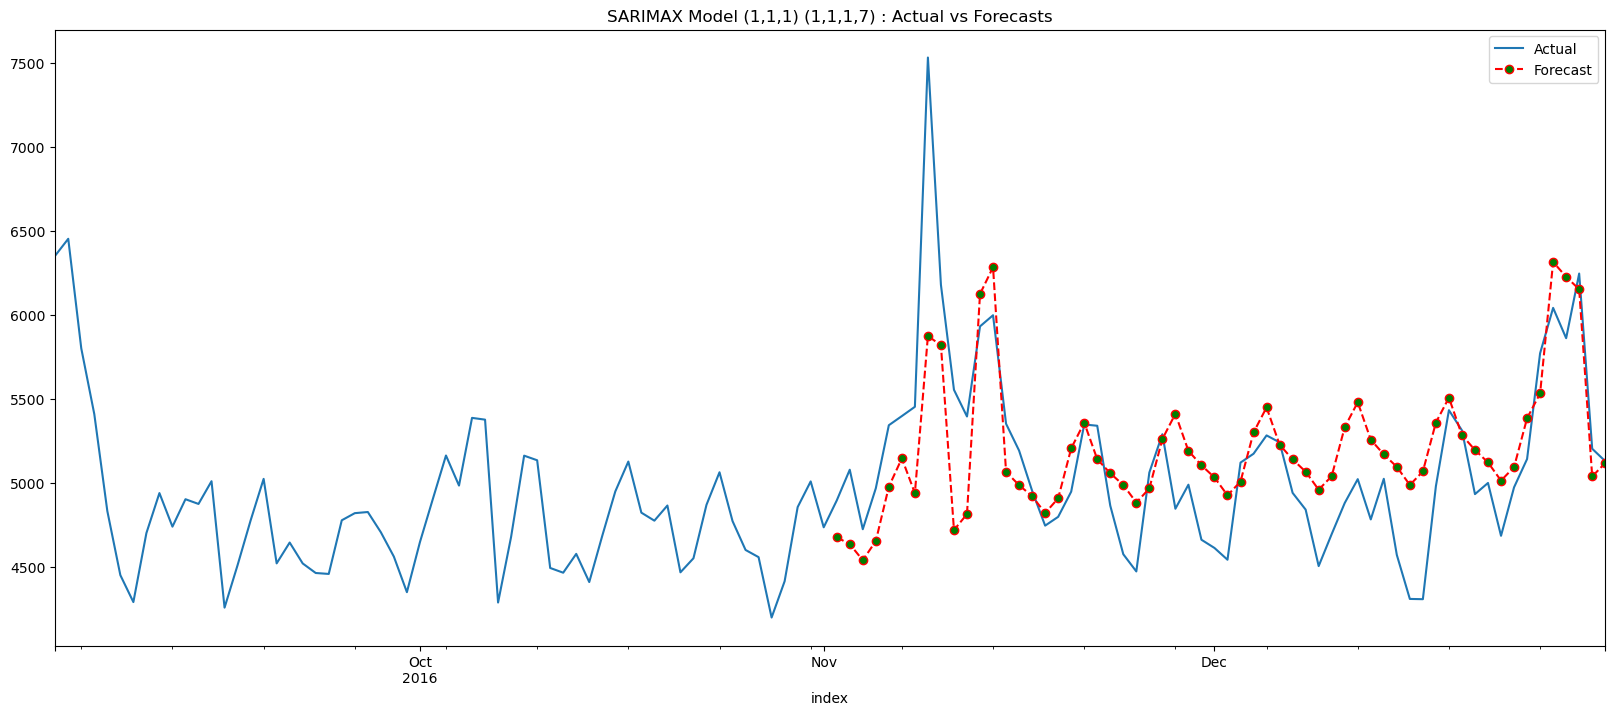

MAE : 306.418
RMSE : 399.017
MAPE: 0.06


In [103]:
exog = exog_en['Exog'].to_numpy()
p,d,q,P,D,Q,s = 1,1,1,1,1,1,7
n_forecast = 60
model = SARIMAX(TS[:-n_forecast], order =(p,d,q), seasonal_order=(P, D, Q, s), exog = exog[:-n_forecast], initialization='approximate_diffuse')
model_fit = model.fit()
#Creating forecast for last n-values
model_forecast = model_fit.forecast(n_forecast, dynamic = True, exog = pd.DataFrame(exog[-n_forecast:]))

plt.figure(figsize = (20,8))
TS[-120:].plot(label = 'Actual')
model_forecast[-120:].plot(label = 'Forecast', color = 'red', linestyle='dashed', marker='o',markerfacecolor='green')
plt.legend(loc="upper right")
plt.title(f'SARIMAX Model ({p},{d},{q}) ({P},{D},{Q},{s}) : Actual vs Forecasts')
plt.show()

(_,_,_) = performance(TS.values[-n_forecast:], model_forecast.values, print_metrics=True)

### Insight
- SARIMAX model is doing a significantly better job. We need to search for the right order values

In [105]:
def SARIMAX_search(TS, forecast, p_list, d_list, q_list, P_list, D_list, Q_list, s_list, exog=[]):
    counter = 0
    #perf_df = pd.DataFrame(columns=['serial', 'pdq', 'PDQs', 'mape', 'rmse', 'aic', 'bic'])
    perf_df = pd.DataFrame(columns=['serial', 'pdq', 'PDQs', 'mape', 'rmse'])

    for p in p_list:
        for d in d_list:
            for q in q_list:
                for P in P_list:
                    for D in D_list:
                        for Q in Q_list:
                            for s in s_list:
                                try:
                                    model = SARIMAX(TS[:-n_forecast], order =(p,d,q), seasonal_order=(P, D, Q, s), exog = exog[:-n_forecast], initialization='approximate_diffuse')
                                    model_fit = model.fit()
                                    model_forecast = model_fit.forecast(n_forecast, dynamic = True, exog = pd.DataFrame(exog[-n_forecast:]))
                                    MAE, RMSE, MAPE = performance(TS.values[-n_forecast:], model_forecast.values, print_metrics=False)
                                    counter += 1
                                    #list_row = [counter, (p,d,q), (P,D,Q,s), MAPE, RMSE, model_fit.aic, model_fit.bic]
                                    list_row = [counter, (p,d,q), (P,D,Q,s), MAPE, RMSE]
                                    perf_df.loc[len(perf_df)] = list_row
                                    print(f'Combination {counter} out of {(len(p_list)*len(d_list)*len(q_list)*len(P_list)*len(D_list)*len(Q_list)*len(s_list))}')
                                except:
                                    continue
    return perf_df

In [106]:
if 0:
    TS = ts_english.copy(deep=True)
    n_forecast = 60
    p_list = [0,1]
    d_list = [1]
    q_list = [0,1]
    P_list = [2,3]
    D_list = [1]
    Q_list = [2,3]
    s_list = [7]
    exog = exog_en['Exog'].to_numpy()
    perf_df = SARIMAX_search(TS, n_forecast, p_list, d_list, q_list, P_list, D_list, Q_list, s_list, exog)
    perf_df.sort_values(['mape', 'rmse'])

After the above experiment, p,d,q,P,D,Q,s = 1,1,1,2,1,3,7 were found to be best values with low mape

C:\Users\DELL\anaconda_soft\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda_soft\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda_soft\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


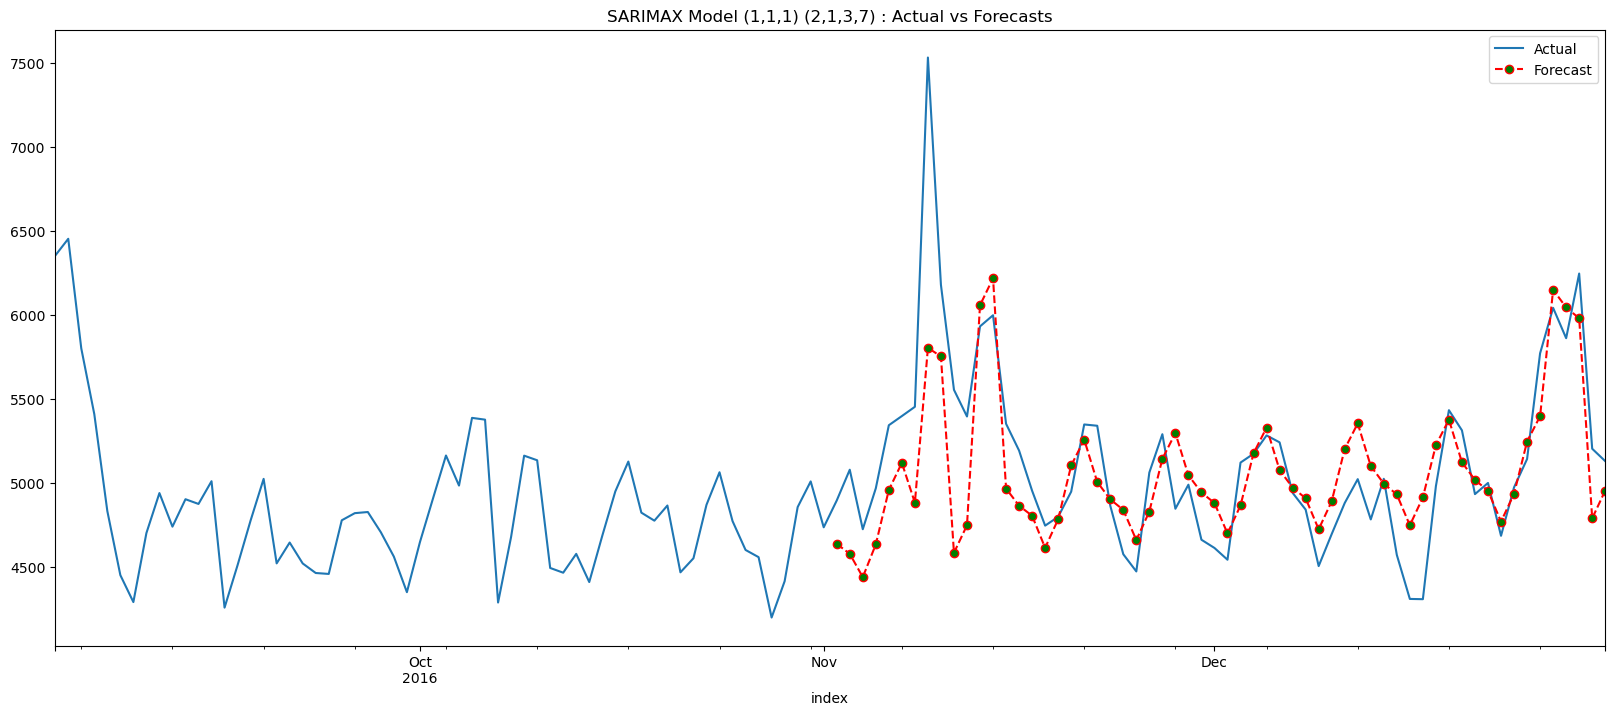

MAE : 269.37
RMSE : 375.105
MAPE: 0.051


In [108]:
exog = exog_en['Exog'].to_numpy()
p,d,q,P,D,Q,s = 1,1,1,2,1,3,7
n_forecast = 60
model = SARIMAX(TS[:-n_forecast], order =(p,d,q), seasonal_order=(P, D, Q, s), exog = exog[:-n_forecast], initialization='approximate_diffuse')
model_fit = model.fit()
#Creating forecast for last n-values
model_forecast = model_fit.forecast(n_forecast, dynamic = True, exog = pd.DataFrame(exog[-n_forecast:]))

plt.figure(figsize = (20,8))
TS[-120:].plot(label = 'Actual')
model_forecast[-120:].plot(label = 'Forecast', color = 'red', linestyle='dashed', marker='o',markerfacecolor='green')
plt.legend(loc="upper right")
plt.title(f'SARIMAX Model ({p},{d},{q}) ({P},{D},{Q},{s}) : Actual vs Forecasts')
plt.show()

(_,_,_) = performance(TS.values[-n_forecast:], model_forecast.values, print_metrics=True)

### Insight
- There is good improvement in the SARIMAX model after tuning the parameters

## Facebook Prophet

In [111]:
TS = ts_english.copy(deep=True).reset_index()
TS = TS[['index', 'English']]
TS.columns = ['ds', 'y']
TS['ds'] = pd.to_datetime(TS['ds'])
exog = exog_en['Exog']
TS['exog'] = exog.values
TS.tail()

,ds,y,exog
545,2016-12-27,6040.680728,1
546,2016-12-28,5860.227559,1
547,2016-12-29,6245.127510,1
548,2016-12-30,5201.783018,0
549,2016-12-31,5127.916418,0


In [112]:
from prophet import Prophet
my_model = Prophet(interval_width=0.95, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False)
my_model.add_regressor('exog')
n_forecast = 60
my_model.fit(TS)
future_dates = my_model.make_future_dataframe(periods=0)
future_dates['exog'] = TS['exog']
forecast = my_model.predict(future_dates)

# Step 6: Merge Predictions with Actual Data
TS['yhat'] = forecast['yhat']  # The predicted values (yhat) from Prophet
TS['yhat_upper'] = forecast['yhat_upper']  # Upper bound of the confidence interval
TS['yhat_lower'] = forecast['yhat_lower']  # Lower bound of the confidence interval

(_,_,_) = performance(TS['y'], TS['yhat'], print_metrics=True)

20:50:59 - cmdstanpy - INFO - Chain [1] start processing
20:50:59 - cmdstanpy - INFO - Chain [1] done processing


MAE : 287.499
RMSE : 441.92
MAPE: 0.06


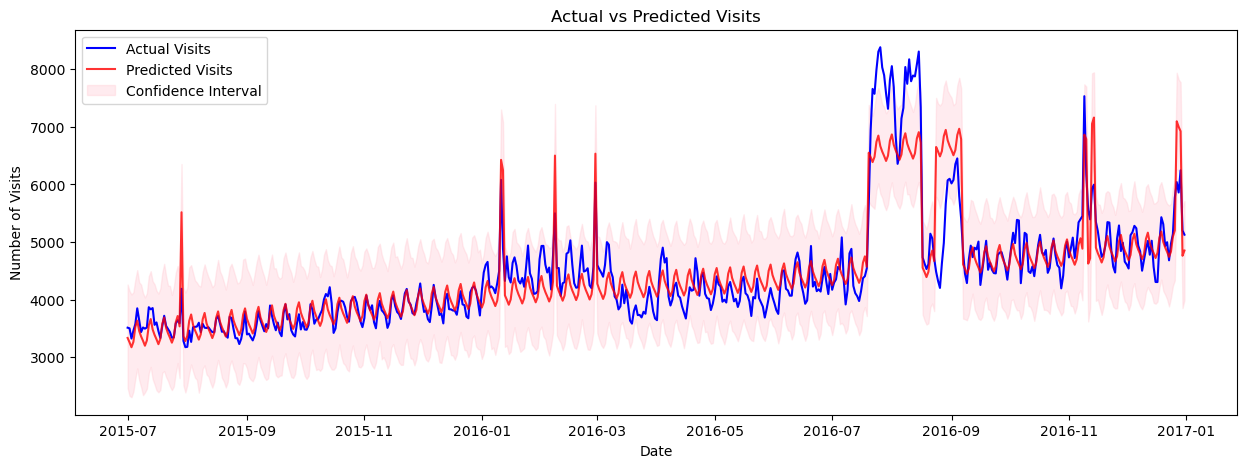

In [113]:
# Plot actual vs predicted visits
plt.figure(figsize=(15, 5))
plt.plot(TS['ds'], TS['y'], label='Actual Visits', color='blue')
plt.plot(TS['ds'], TS['yhat'], label='Predicted Visits', color='red', alpha=0.8)
plt.fill_between(TS['ds'], TS['yhat_lower'], TS['yhat_upper'], color='pink', alpha=0.3, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.title('Actual vs Predicted Visits')
plt.legend()
plt.show()

### Insight
- Phropet is doing an incredible job capturing the trend and unusual peaks. It is also capturing the seasonality very well

## Comparison

## Chinese

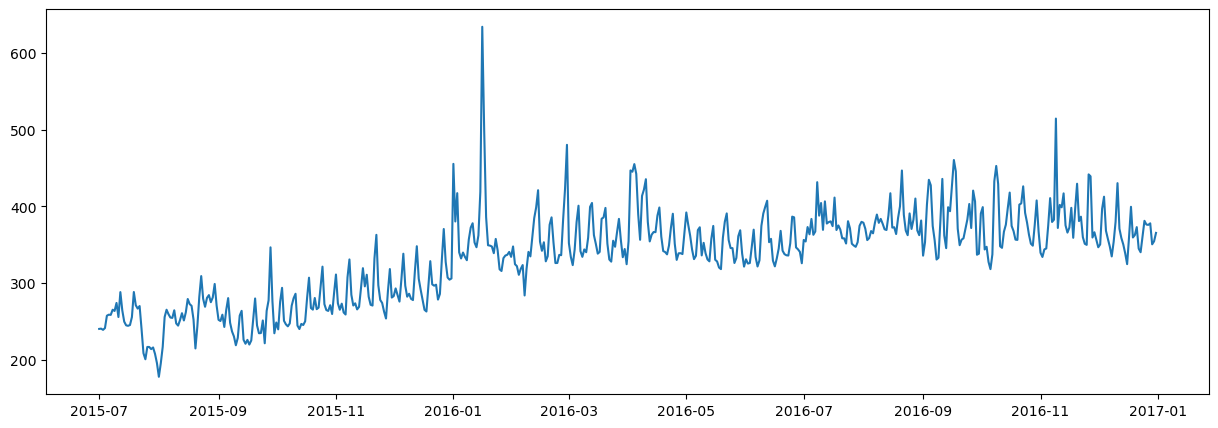

20:51:00 - cmdstanpy - INFO - Chain [1] start processing
20:51:00 - cmdstanpy - INFO - Chain [1] done processing


MAE : 19.352
RMSE : 28.702
MAPE: 0.058


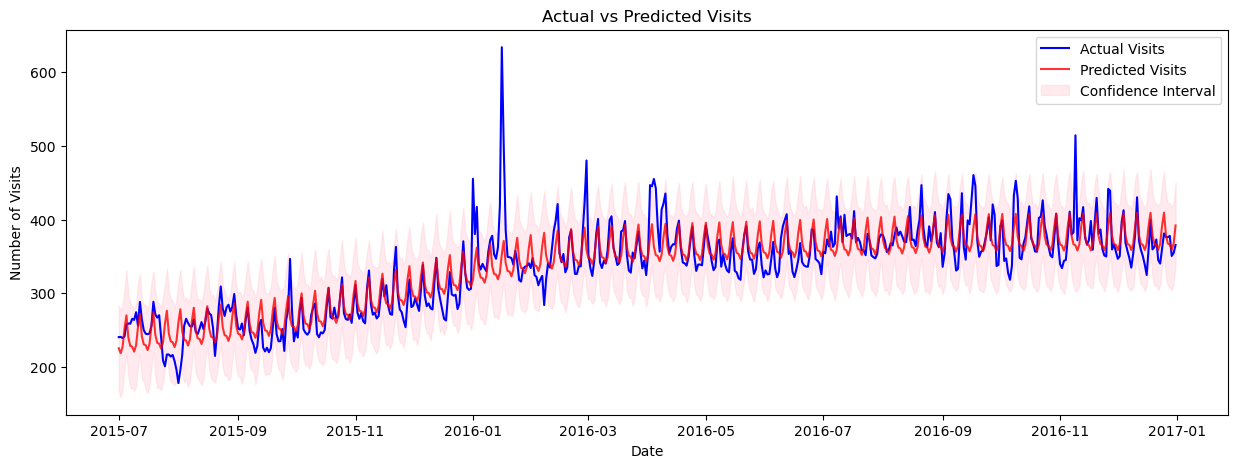

In [117]:
lang = 'Chinese'
TS = df_agg[lang].copy(deep=True)
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(TS.index, TS)
plt.show()

TS = TS.reset_index()
TS = TS[['index', lang]]
TS.columns = ['ds', 'y']
TS['ds'] = pd.to_datetime(TS['ds'])
TS.tail()

my_model = Prophet(interval_width=0.95, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False)
my_model.fit(TS)
future_dates = my_model.make_future_dataframe(periods=0)
forecast = my_model.predict(future_dates)

# Step 6: Merge Predictions with Actual Data
TS['yhat'] = forecast['yhat']  # The predicted values (yhat) from Prophet
TS['yhat_upper'] = forecast['yhat_upper']  # Upper bound of the confidence interval
TS['yhat_lower'] = forecast['yhat_lower']  # Lower bound of the confidence interval

(_,_,_) = performance(TS['y'], TS['yhat'], print_metrics=True)

# Plot actual vs predicted visits
plt.figure(figsize=(15, 5))
plt.plot(TS['ds'], TS['y'], label='Actual Visits', color='blue')
plt.plot(TS['ds'], TS['yhat'], label='Predicted Visits', color='red', alpha=0.8)
plt.fill_between(TS['ds'], TS['yhat_lower'], TS['yhat_upper'], color='pink', alpha=0.3, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.title('Actual vs Predicted Visits')
plt.legend()
plt.show()

## French

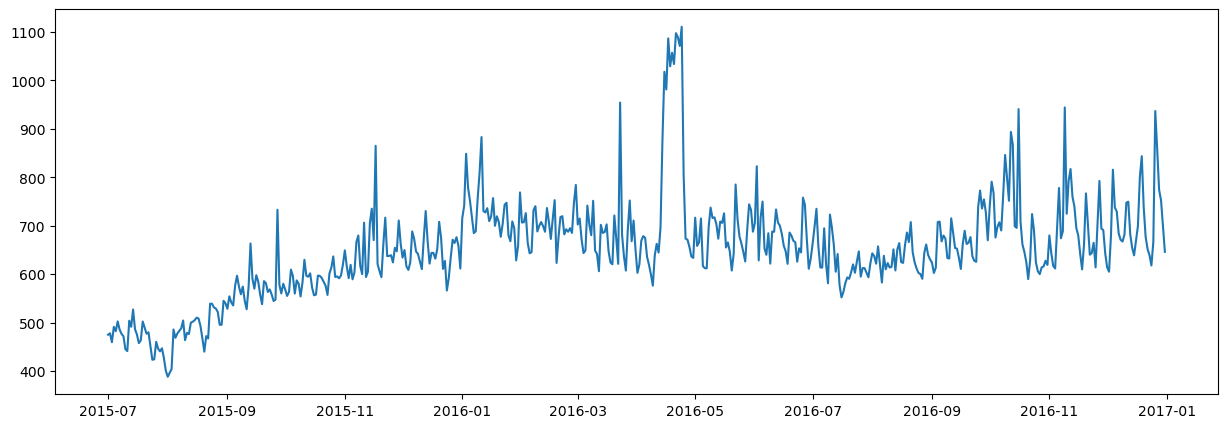

20:51:00 - cmdstanpy - INFO - Chain [1] start processing
20:51:00 - cmdstanpy - INFO - Chain [1] done processing


MAE : 42.004
RMSE : 68.664
MAPE: 0.061


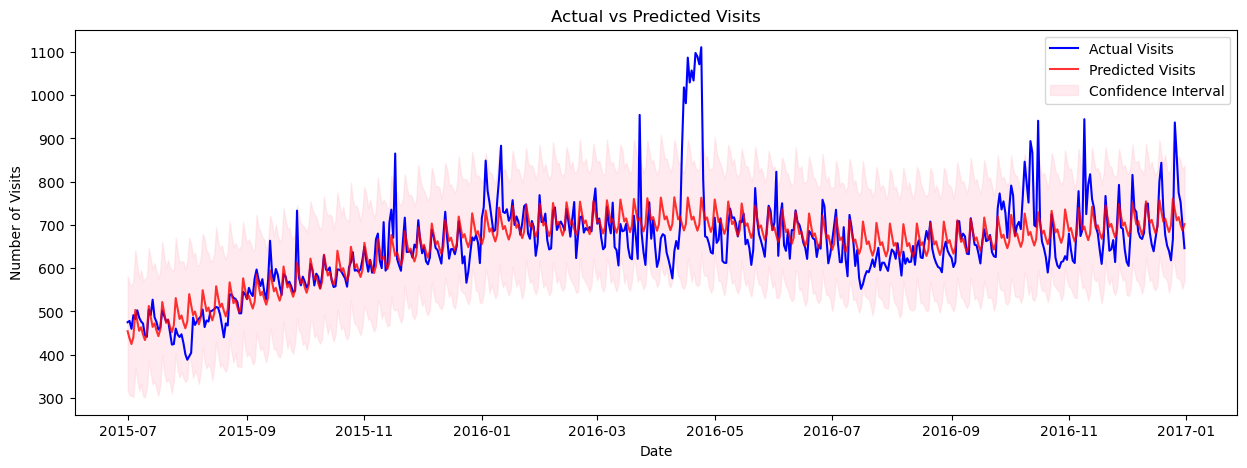

In [119]:
lang = 'French'
TS = df_agg[lang].copy(deep=True)
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(TS.index, TS)
plt.show()

TS = TS.reset_index()
TS = TS[['index', lang]]
TS.columns = ['ds', 'y']
TS['ds'] = pd.to_datetime(TS['ds'])
TS.tail()

my_model = Prophet(interval_width=0.95, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False)
my_model.fit(TS)
future_dates = my_model.make_future_dataframe(periods=0)
forecast = my_model.predict(future_dates)

# Step 6: Merge Predictions with Actual Data
TS['yhat'] = forecast['yhat']  # The predicted values (yhat) from Prophet
TS['yhat_upper'] = forecast['yhat_upper']  # Upper bound of the confidence interval
TS['yhat_lower'] = forecast['yhat_lower']  # Lower bound of the confidence interval

(_,_,_) = performance(TS['y'], TS['yhat'], print_metrics=True)

# Plot actual vs predicted visits
plt.figure(figsize=(15, 5))
plt.plot(TS['ds'], TS['y'], label='Actual Visits', color='blue')
plt.plot(TS['ds'], TS['yhat'], label='Predicted Visits', color='red', alpha=0.8)
plt.fill_between(TS['ds'], TS['yhat_lower'], TS['yhat_upper'], color='pink', alpha=0.3, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.title('Actual vs Predicted Visits')
plt.legend()
plt.show()

## German

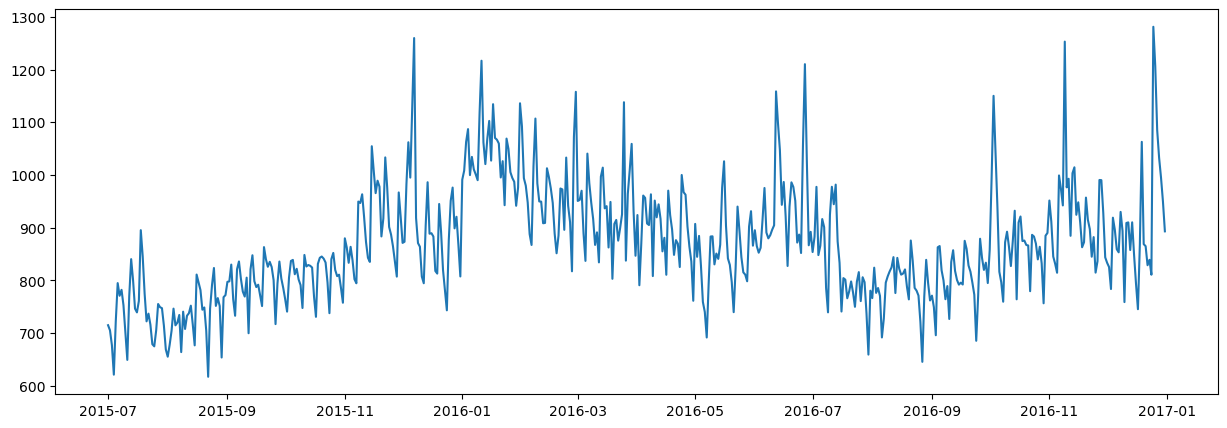

20:51:00 - cmdstanpy - INFO - Chain [1] start processing
20:51:00 - cmdstanpy - INFO - Chain [1] done processing


MAE : 49.367
RMSE : 68.284
MAPE: 0.055


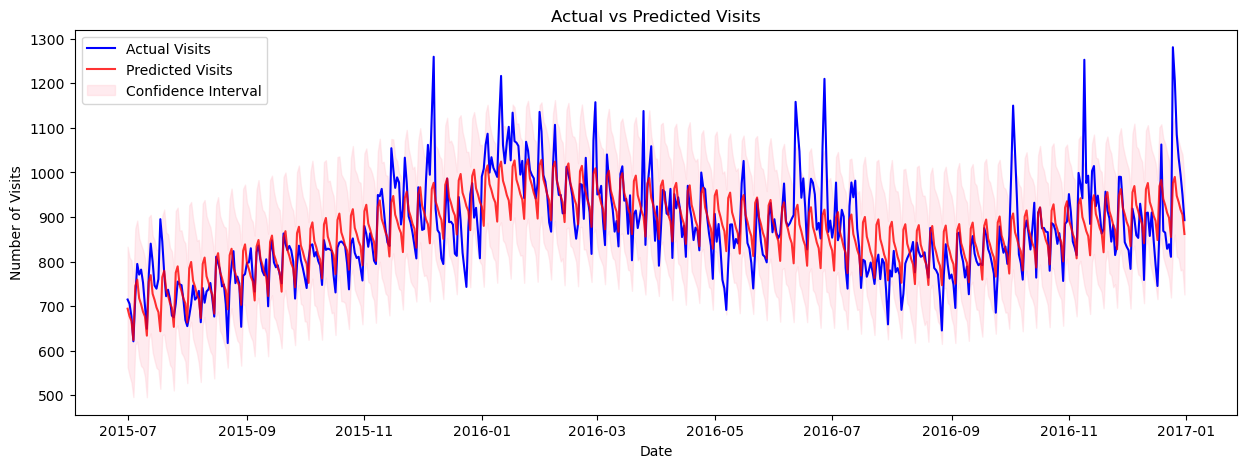

In [121]:
lang = 'German'
TS = df_agg[lang].copy(deep=True)
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(TS.index, TS)
plt.show()

TS = TS.reset_index()
TS = TS[['index', lang]]
TS.columns = ['ds', 'y']
TS['ds'] = pd.to_datetime(TS['ds'])
TS.tail()

my_model = Prophet(interval_width=0.95, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False)
my_model.fit(TS)
future_dates = my_model.make_future_dataframe(periods=0)
forecast = my_model.predict(future_dates)

# Step 6: Merge Predictions with Actual Data
TS['yhat'] = forecast['yhat']  # The predicted values (yhat) from Prophet
TS['yhat_upper'] = forecast['yhat_upper']  # Upper bound of the confidence interval
TS['yhat_lower'] = forecast['yhat_lower']  # Lower bound of the confidence interval

(_,_,_) = performance(TS['y'], TS['yhat'], print_metrics=True)

# Plot actual vs predicted visits
plt.figure(figsize=(15, 5))
plt.plot(TS['ds'], TS['y'], label='Actual Visits', color='blue')
plt.plot(TS['ds'], TS['yhat'], label='Predicted Visits', color='red', alpha=0.8)
plt.fill_between(TS['ds'], TS['yhat_lower'], TS['yhat_upper'], color='pink', alpha=0.3, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.title('Actual vs Predicted Visits')
plt.legend()
plt.show()

## Japanese

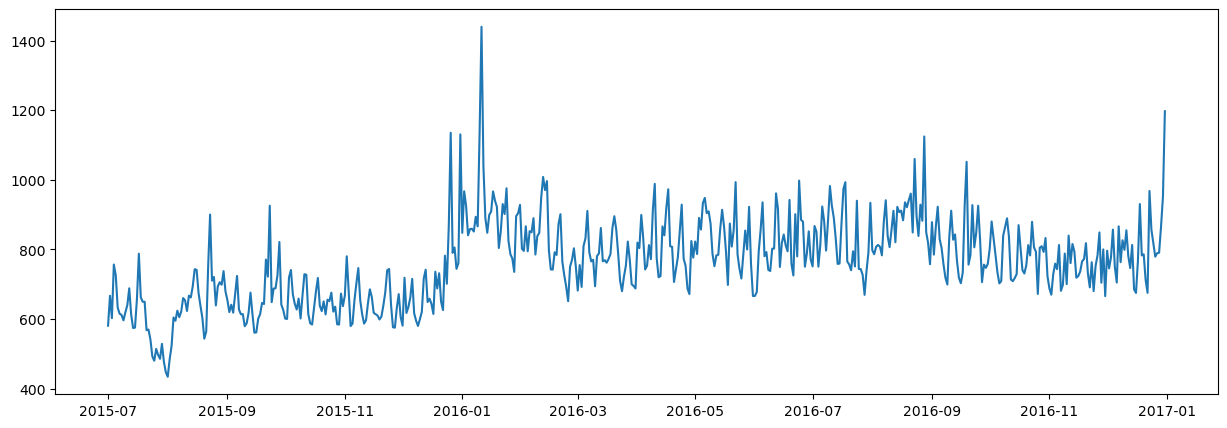

20:51:01 - cmdstanpy - INFO - Chain [1] start processing
20:51:01 - cmdstanpy - INFO - Chain [1] done processing


MAE : 61.17
RMSE : 84.08
MAPE: 0.08


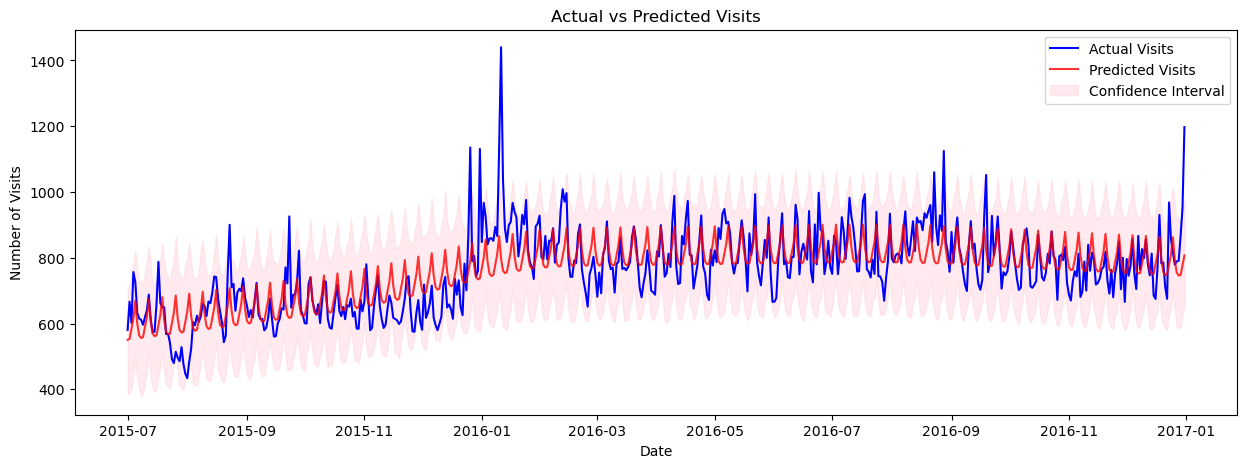

In [123]:
lang = 'Japanese'
TS = df_agg[lang].copy(deep=True)
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(TS.index, TS)
plt.show()

TS = TS.reset_index()
TS = TS[['index', lang]]
TS.columns = ['ds', 'y']
TS['ds'] = pd.to_datetime(TS['ds'])
TS.tail()

my_model = Prophet(interval_width=0.95, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False)
my_model.fit(TS)
future_dates = my_model.make_future_dataframe(periods=0)
forecast = my_model.predict(future_dates)

# Step 6: Merge Predictions with Actual Data
TS['yhat'] = forecast['yhat']  # The predicted values (yhat) from Prophet
TS['yhat_upper'] = forecast['yhat_upper']  # Upper bound of the confidence interval
TS['yhat_lower'] = forecast['yhat_lower']  # Lower bound of the confidence interval

(_,_,_) = performance(TS['y'], TS['yhat'], print_metrics=True)

# Plot actual vs predicted visits
plt.figure(figsize=(15, 5))
plt.plot(TS['ds'], TS['y'], label='Actual Visits', color='blue')
plt.plot(TS['ds'], TS['yhat'], label='Predicted Visits', color='red', alpha=0.8)
plt.fill_between(TS['ds'], TS['yhat_lower'], TS['yhat_upper'], color='pink', alpha=0.3, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.title('Actual vs Predicted Visits')
plt.legend()
plt.show()

## Russian

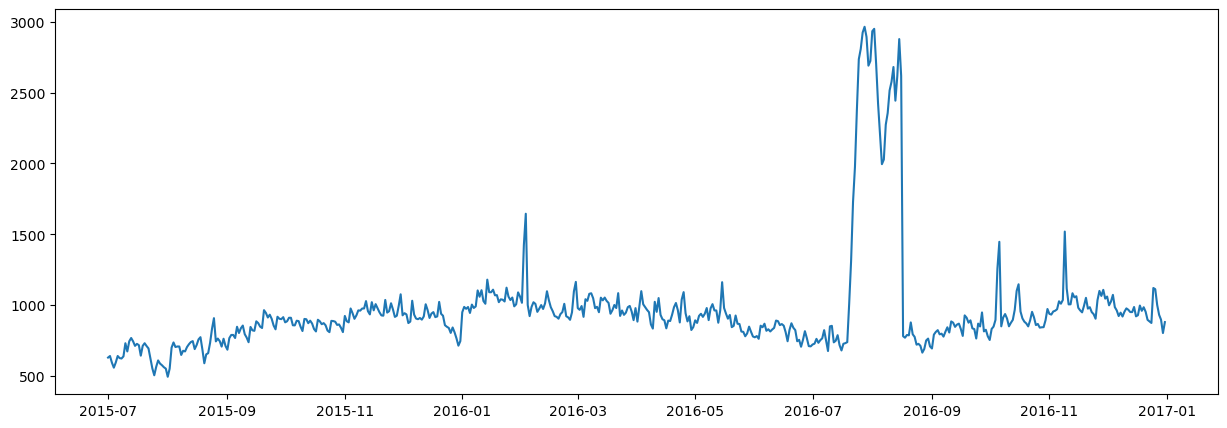

20:51:02 - cmdstanpy - INFO - Chain [1] start processing
20:51:02 - cmdstanpy - INFO - Chain [1] done processing


MAE : 185.548
RMSE : 353.401
MAPE: 0.169


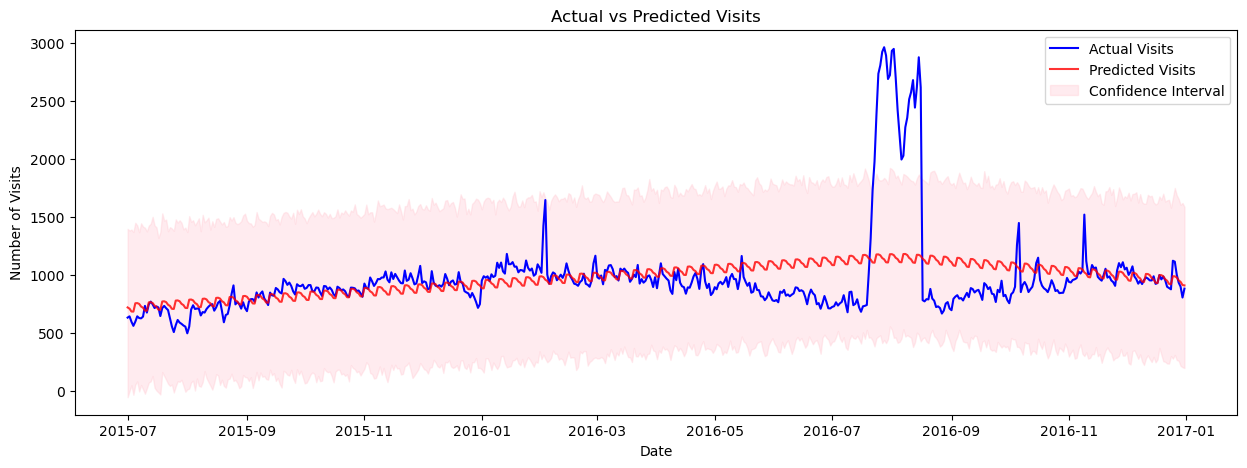

In [125]:
lang = 'Russian'
TS = df_agg[lang].copy(deep=True)
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(TS.index, TS)
plt.show()

TS = TS.reset_index()
TS = TS[['index', lang]]
TS.columns = ['ds', 'y']
TS['ds'] = pd.to_datetime(TS['ds'])
TS.tail()

my_model = Prophet(interval_width=0.95, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False)
my_model.fit(TS)
future_dates = my_model.make_future_dataframe(periods=0)
forecast = my_model.predict(future_dates)

# Step 6: Merge Predictions with Actual Data
TS['yhat'] = forecast['yhat']  # The predicted values (yhat) from Prophet
TS['yhat_upper'] = forecast['yhat_upper']  # Upper bound of the confidence interval
TS['yhat_lower'] = forecast['yhat_lower']  # Lower bound of the confidence interval

(_,_,_) = performance(TS['y'], TS['yhat'], print_metrics=True)

# Plot actual vs predicted visits
plt.figure(figsize=(15, 5))
plt.plot(TS['ds'], TS['y'], label='Actual Visits', color='blue')
plt.plot(TS['ds'], TS['yhat'], label='Predicted Visits', color='red', alpha=0.8)
plt.fill_between(TS['ds'], TS['yhat_lower'], TS['yhat_upper'], color='pink', alpha=0.3, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.title('Actual vs Predicted Visits')
plt.legend()
plt.show()

## Spanish

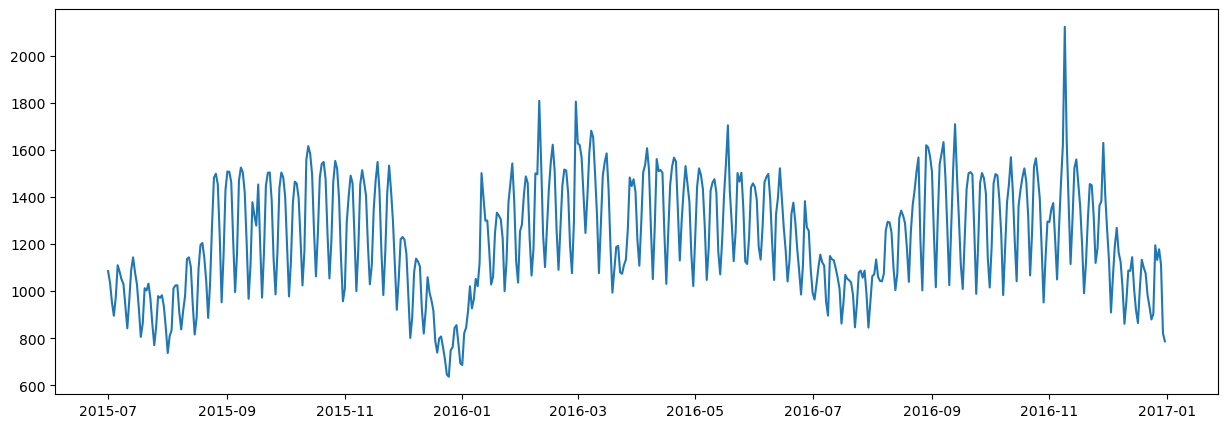

20:51:02 - cmdstanpy - INFO - Chain [1] start processing
20:51:02 - cmdstanpy - INFO - Chain [1] done processing


MAE : 131.112
RMSE : 170.643
MAPE: 0.115


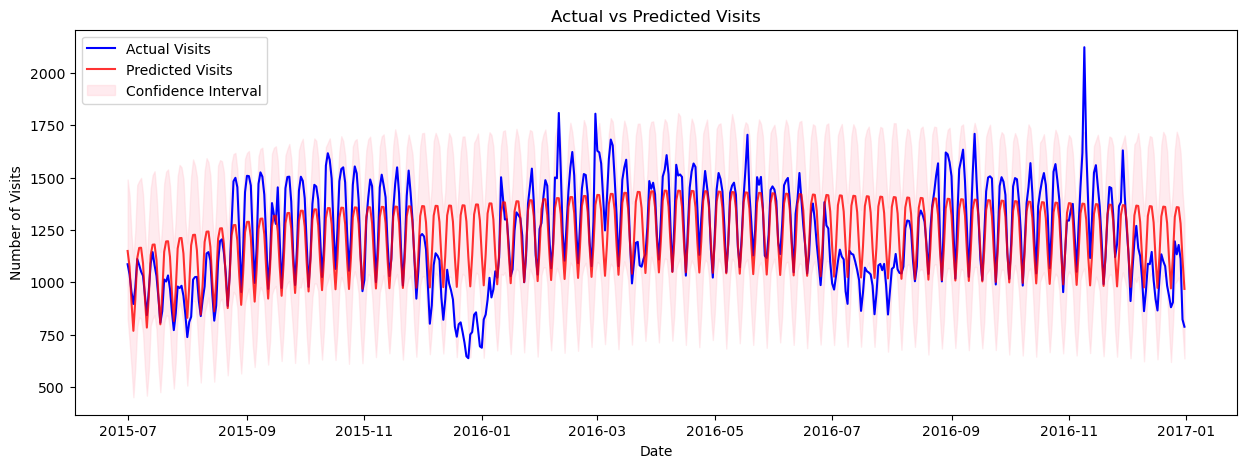

In [127]:
lang = 'Spanish'
TS = df_agg[lang].copy(deep=True)
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(TS.index, TS)
plt.show()

TS = TS.reset_index()
TS = TS[['index', lang]]
TS.columns = ['ds', 'y']
TS['ds'] = pd.to_datetime(TS['ds'])
TS.tail()

my_model = Prophet(interval_width=0.95, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False)
my_model.fit(TS)
future_dates = my_model.make_future_dataframe(periods=0)
forecast = my_model.predict(future_dates)

# Step 6: Merge Predictions with Actual Data
TS['yhat'] = forecast['yhat']  # The predicted values (yhat) from Prophet
TS['yhat_upper'] = forecast['yhat_upper']  # Upper bound of the confidence interval
TS['yhat_lower'] = forecast['yhat_lower']  # Lower bound of the confidence interval

(_,_,_) = performance(TS['y'], TS['yhat'], print_metrics=True)

# Plot actual vs predicted visits
plt.figure(figsize=(15, 5))
plt.plot(TS['ds'], TS['y'], label='Actual Visits', color='blue')
plt.plot(TS['ds'], TS['yhat'], label='Predicted Visits', color='red', alpha=0.8)
plt.fill_between(TS['ds'], TS['yhat_lower'], TS['yhat_upper'], color='pink', alpha=0.3, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.title('Actual vs Predicted Visits')
plt.legend()
plt.show()

## Inferences : 

1. There are also mediawiki & commons.wikimedia pages that host media are available in the dataset 
2. Of the pages from 7 different languages, English has the highest proportion, closely followed by Japanese. Rest of the languages roughly have same proportion of ~12% 
3. AccessOrigin is spider for ~24% of the pages and all-agents for ~76%
4. AccessType is all-acess for about 50% of the pages. Then for desktop & mobile-web is ~25% each
6. During the months of August 2016, there is a spike in daily average views of both English & Russian pages
7. Also, a spike is observed in Nov,2016. This time for pages in Spanish, Russian, and German as well
8. English average views seem to have trend & seasonality where as other languages have seasonality mostly
9. In daily median views, Spanish language pages seem to be higher than other language pages
10. Spanish, Russian, and English median daily views had a drop.
11. In later months of 2016, english pages median daily views is on part with that of Spanish

## Recommendations:
1. English has high average daily views compared to other languages. Recommend running more ads in English pages
2. There are more than 50% of pages with all-access compared to desktop & mobile-web alone 
3. Knowing the language for mediawiki & commons.wikimedia would enhance our training data further 
4. Like campaign data for English pages, availability of such exogenous data would improve model predictions 
5. With more time and resources, we can experiment with prophet parameters to bring better MAPE values.  
